# Analyzing global temperature and carbon emission with respect to economic status
                    

### Megan Shen, Sijing Yu
## ![Image Melting Earth](https://miro.medium.com/max/1461/1*4z3Y2cIQWzNkc_SV4JO9pA.png)
####  [Image Source](https://medium.com/student-conservation-corner/loss-of-arctic-ice-makes-polar-bears-vulnerable-to-extinction-ed93e6352d48)


## Outline
### 1. Introduction
### 2. Data Preparation
   2.1 Required Libraries <br>                            
   2.2 Dataset Sources<br>
   2.3 Global temperature data<br>
   2.4 Global carbon emission data<br>
   2.5 Data Visualization
### 3. Further data exploration
   3.1 Carbon emission and emission sources distribution by economic status (developed or not) <br>
### 4. Data Analysis -- Regression and Prediction
   4.1 Global temperature<br>
   4.2 Carbon emissions -- developed and developing<br>
   4.3 Hypothesis - Correlations between temperature and emission 
### 5. Machine learning algorithms application
   5.1 Classification by country as target variable -- random forest <br>
   5.2 Prediction of economic status by gdp, carbon emission, population, Electricity Comsuption -- using decision <br><b>
   5.3 Related Hypotheses
 

## 1. Introduction
   Greta Thunberg's speech at the United Nations climate change summit gained great worldwide attention and she became TIME's Person of the Year. However, this has led to multiple ongoing debates over climate change -- Is climate change real? Is it normal in the history of Earth? Is it really a big problem? If so, how long will it take for disastrous consequeces to happen? How did carbon emission contribute to it?  <br>
   
   With all those questions being asked, we want to use detailed data to examine the trend and relationship between global temperature and carbon emission specifically from fossil fuels, the largest source of CO2 emissions (93% of total emission of U.S. in 2017), and predict possible trends that will occur if no action is taken. We hope that after reading you will gain a better understanding of the issue and pay more attention to climate change in the future!<br>
## 2. Data Preparation
### 2.1 Required Libraries
   a. Pandas: mainly used to analyze data by manipulating dataframes <br>
   b. Numpy: scientific Computing <br>
   c. sklearn: machine learning library <br>
   d. matplotlib: data visualization <br>
   e. warnings: suppress nonsense warnings 

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from statsmodels import api as sm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

### 2.2 Dataset Sources
   a. Global temperature data from [Data.world](https://data.world/amschwinn/global-temp-greenhouse-gas), orginally from [Berkeley Lab](https://cdiac.ess-dive.lbl.gov/trends/emis/tre_glob.html)<br>
   b. CO2 emissions from fossil fuels data from [Data Hub](https://datahub.io/core/co2-fossil-by-nation#resource-fossil-fuel-co2-emissions-by-nation)<br>
   c. Emission of different fuels data from [American Geosciences Institute](https://www.americangeosciences.org/critical-issues/faq/how-much-carbon-dioxide-produced-when-different-fuels-are-burned)<br>
   d. Developed Country list from [World Population Review](http://worldpopulationreview.com/countries/developing-countries/)<br>

### 2.3 Global temperature data
The first step is to load data required data from the web dealing with temperatures over time. We are going to be using data from Data World that displays the land's average temperature monthly in Celcius starting in 1750 to 2015, as well as the land and ocean's average temperature together, min's and max's and uncertainty of each, meaning the 95% confidence interval around the average

In [104]:
land_temp = pd.read_csv("land temp 1750-2015 by month.csv")
land_temp

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
...                                         ...  
3187                                      0.057  
3188                                      0.058  
3189                                      0.062  
3190                                      0.063  
3191                                      0.062  

[3192 rows x 9 columns]

Since having data from each month is no neccessary, we are going to take the mean of each year and look at those values instead 

In [4]:
# Making a new column for time as year
year = []
for time in land_temp['dt']:
    year.append(time[0:4])
    
land_temp['index'] = [int(i) for i in year] 
land_temp['year'] = year

# Group data by year and calculate mean temperature
land_temp = land_temp.groupby('index').mean()
land_temp=land_temp.reset_index()
land_temp

index  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750                8.719364                           2.637818   
1     1751                7.976143                           2.781143   
2     1752                5.779833                           2.977000   
3     1753                8.388083                           3.176000   
4     1754                8.469333                           3.494250   
..     ...                     ...                                ...   
261   2011                9.516000                           0.082000   
262   2012                9.507333                           0.083417   
263   2013                9.606500                           0.097667   
264   2014                9.570667                           0.090167   
265   2015                9.831000                           0.092167   

     LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                   NaN                            NaN                 NaN   
1                   NaN                            NaN                 NaN   
2                   NaN                            NaN                 NaN   
3                   NaN                            NaN                 NaN   
4                   NaN                            NaN                 NaN   
..                  ...                            ...                 ...   
261           15.284833                       0.114333            3.827667   
262           15.332833                       0.107333            3.756167   
263           15.373833                       0.115500            3.911333   
264           15.313583                       0.111667            3.877750   
265           15.572667                       0.106500            4.148833   

     LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                              NaN                             NaN   
..                             ...                             ...   
261                       0.136583                       15.769500   
262                       0.145333                       15.802333   
263                       0.149833                       15.854417   
264                       0.139000                       15.913000   
265                       0.141750                       16.058583   

     LandAndOceanAverageTemperatureUncertainty  
0                                          NaN  
1                                          NaN  
2                                          NaN  
3                                          NaN  
4                                          NaN  
..                                         ...  
261                                   0.059000  
262                                   0.061500  
263                                   0.064667  
264                                   0.063167  
265                                   0.060833  

[266 rows x 9 columns]

From the dataframe above we can see the average temperature and other values by year since 1750. Therefore, trends will be easier to visualize. 

### 2.4 Global carbon emission data and visualization
   Now we are going to load carbon emission data from Data Hub to see the global trend of carbon emissions. Since the original data frame has all countries, and we are just going to look at the world, we extract row 227 from the data frame since that is the only row of values we will use. 

In [5]:
carbon_temp = pd.read_csv('carbon emissions 1751-2017.csv')
carbon_forgraph = carbon_temp.copy()
carbon_temp=carbon_temp.loc[[227]]
carbon_temp

Country     1751      1752      1753      1754      1755      1756  \
227   World  9350528  18704720  28058912  37416768  46778288  56784672   

         1757      1758      1759  ...          2008          2009  \
227  66794720  76808432  86825808  ...  1.260000e+12  1.290000e+12   

             2010          2011          2012          2013          2014  \
227  1.330000e+12  1.360000e+12  1.400000e+12  1.430000e+12  1.470000e+12   

             2015          2016          2017  
227  1.500000e+12  1.540000e+12  1.580000e+12  

[1 rows x 268 columns]

We now melt the data frame to tidy it so the years are not column headers.

In [6]:
carbon_temp=pd.melt(carbon_temp,["Country"],var_name="year")
carbon_temp

Country  year         value
0     World  1751  9.350528e+06
1     World  1752  1.870472e+07
2     World  1753  2.805891e+07
3     World  1754  3.741677e+07
4     World  1755  4.677829e+07
..      ...   ...           ...
262   World  2013  1.430000e+12
263   World  2014  1.470000e+12
264   World  2015  1.500000e+12
265   World  2016  1.540000e+12
266   World  2017  1.580000e+12

[267 rows x 3 columns]

We can see that it includes data from 1751 to 2017

### 2.5 Data visualization
   By having different axis for global temperature and carbon emissions from fossil fuel over time, we are able to see a trend below.

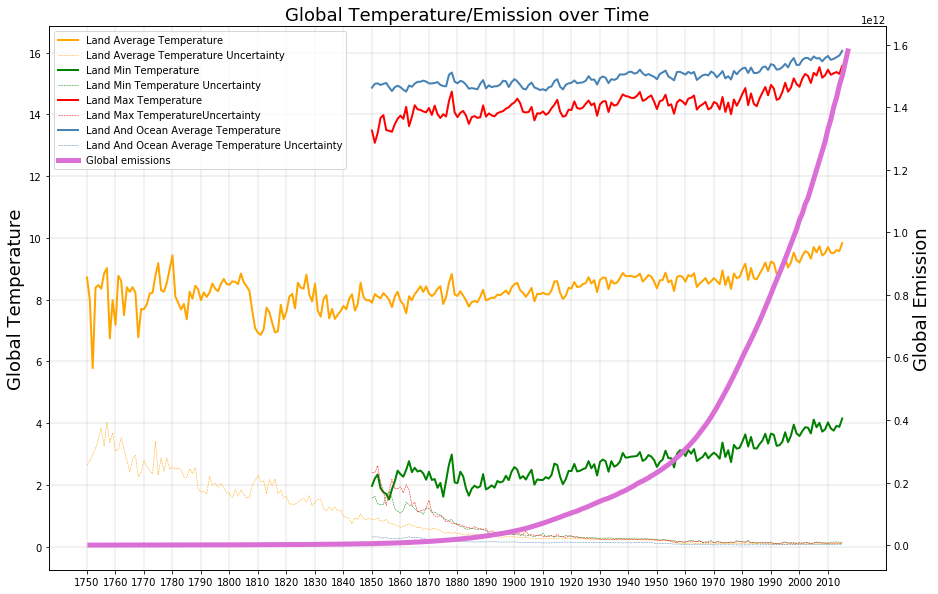

In [7]:
carbon_world = carbon_forgraph.loc[[227]]
carbon_world = carbon_world.drop(columns= ['Country'])
carbon_world.reset_index()

fig, ax = plt.subplots(figsize=(15,10))
ax.grid(linewidth='0.1', color='black')
plt.xticks(np.arange(1750, 2015, 10)) 
ax.set_title('Global Temperature/Emission over Time',size =18)
ax2 = ax.twinx()
ax.set_ylabel('Global Temperature', fontsize = 18)
ax2.set_ylabel('Global Emission', fontsize = 18)
a, = ax.plot(land_temp['index'], land_temp['LandAverageTemperature'],linewidth=2,color = "orange")
b, = ax.plot(land_temp['index'], land_temp['LandAverageTemperatureUncertainty'],linewidth=0.5,linestyle='dashed',color = "orange")
c, = ax.plot(land_temp['index'], land_temp['LandMinTemperature'],linewidth=2,color = "green")
d, = ax.plot(land_temp['index'], land_temp['LandMinTemperatureUncertainty'],linewidth=0.5,linestyle='dashed',color = "green")
e, = ax.plot(land_temp['index'], land_temp['LandMaxTemperature'],linewidth=2,color = "red")
f, = ax.plot(land_temp['index'], land_temp['LandMaxTemperatureUncertainty'],linewidth=0.5,linestyle='dashed',color = "red")
g, = ax.plot(land_temp['index'], land_temp['LandAndOceanAverageTemperature'],linewidth=2,color = "steelblue")
h, = ax.plot(land_temp['index'], land_temp['LandAndOceanAverageTemperatureUncertainty'],linewidth=0.5,linestyle='dashed',color = "steelblue")
i, = ax2.plot(range(1751,2018,1), carbon_world[carbon_world.index == 227].T,linewidth=5,color = "orchid")
labels = ('Land Average Temperature', 'Land Average Temperature Uncertainty','Land Min Temperature','Land Min Temperature Uncertainty','Land Max Temperature',
          'Land Max TemperatureUncertainty','Land And Ocean Average Temperature','Land And Ocean Average Temperature Uncertainty',"Global emissions")
plt.legend(prop={'size': 10},loc = "upper left",handles = (a, b, c, d, e, f, g, h, i), labels= labels)
plt.show()

From the graph above we can see that emission has soared in 20th century and temperature is gradually increasing. Both of them have a trend of continuing growing.<b>

## 3. Further data exploration

### 3.1 Carbon emission and emission sources by economic status (developed or not) 
Now we are going to look at CO2 emissions solely from using fossil fuels, since they are largest source of greenhouse gas emissions from human contributions in the United States (according to Environmental Protection Agency). Therefore, by seeing the trend of CO2 emissions over time, we can make predictions on how high they will be in the future, and make informed descisions about how we can reduce these emissions. We will be using data also from Data Hub, which not only has the country's fuel per year, but as also has the capita and state of fuel emisison. Therefore, we can see which state of fuel is used the most, therefore has to be reduced, and whether there is a trend with carbon emissions from fossil fuels per capita .

In [8]:
# reading data
fuel_df=pd.read_csv('fossil-fuel-co2-emissions-by-nation_csv.csv')
# rearrangibng columns, adding th bunker fuels emission to the total and getting rid of it
fuel_df=fuel_df[['Country', 'Year', 'Total', 'Solid Fuel', 'Liquid Fuel',
       'Gas Fuel', 'Cement', 'Gas Flaring', 'Per Capita',
       'Bunker fuels (Not in Total)']]
fuel_df['Total'] += fuel_df['Bunker fuels (Not in Total)']
fuel_df.rename(columns={'Bunker fuels (Not in Total)':'Bunker fuels'}, inplace=True)
fuel_df

Country  Year  Total  Solid Fuel  Liquid Fuel  \
0                 UNITED KINGDOM  1751   2552        2552            0   
1                 UNITED KINGDOM  1752   2553        2553            0   
2                 UNITED KINGDOM  1753   2553        2553            0   
3                 UNITED KINGDOM  1754   2554        2554            0   
4                 UNITED KINGDOM  1755   2555        2555            0   
...                          ...   ...    ...         ...          ...   
17227                   VIET NAM  2014  46278       19246        12694   
17228  WALLIS AND FUTUNA ISLANDS  2014      7           0            6   
17229                      YEMEN  2014   6343         137         5090   
17230                     ZAMBIA  2014   1261         132          797   
17231                   ZIMBABWE  2014   3287        2097         1005   

       Gas Fuel  Cement  Gas Flaring  Per Capita  Bunker fuels  
0             0       0            0        0.00             0  
1             0       0            0        0.00             0  
2             0       0            0        0.00             0  
3             0       0            0        0.00             0  
4             0       0            0        0.00             0  
...         ...     ...          ...         ...           ...  
17227      5349    8229            0        0.49           761  
17228         0       0            0        0.44             1  
17229       581     381            0        0.24           153  
17230         0     299            0        0.08            33  
17231         0     177            0        0.22             9  

[17232 rows x 10 columns]

Since our focus is on global emissions, we'll make a data frame of developed countries and developing countries and analyze their data to see the differences in fossil fuels used. We will make a new column called Developed, and mark it as true if a country has a human development index >= .8, since, according to the United Nations, that is a good classification that a country is developed. 
We will go thru each country in our data frame, check it's human development index from a data frame (data copy.csv) and mark whether it's developed in the Developed column. 

In [9]:
# load data of human development index from the World Population Review
data_countries=pd.read_csv('data copy.csv')
arr_developed_cap=[]
for x in range(0,188):
    if data_countries.loc[x]['humanDevelopmentIndex']>=.8:
        arr_developed_cap.append(data_countries.loc[x]['name'].upper())

# labeling the developed countries as True for developed, false otherwise
count=0
for index,row in fuel_df.iterrows():
    if (row['Country'] in arr_developed_cap):
        fuel_df.loc[count,'Developed']=True
        count+=1
    else:
        fuel_df.loc[count,'Developed']=False
        count+=1
fuel_df

Country  Year  Total  Solid Fuel  Liquid Fuel  \
0                 UNITED KINGDOM  1751   2552        2552            0   
1                 UNITED KINGDOM  1752   2553        2553            0   
2                 UNITED KINGDOM  1753   2553        2553            0   
3                 UNITED KINGDOM  1754   2554        2554            0   
4                 UNITED KINGDOM  1755   2555        2555            0   
...                          ...   ...    ...         ...          ...   
17227                   VIET NAM  2014  46278       19246        12694   
17228  WALLIS AND FUTUNA ISLANDS  2014      7           0            6   
17229                      YEMEN  2014   6343         137         5090   
17230                     ZAMBIA  2014   1261         132          797   
17231                   ZIMBABWE  2014   3287        2097         1005   

       Gas Fuel  Cement  Gas Flaring  Per Capita  Bunker fuels  Developed  
0             0       0            0        0.00             0       True  
1             0       0            0        0.00             0       True  
2             0       0            0        0.00             0       True  
3             0       0            0        0.00             0       True  
4             0       0            0        0.00             0       True  
...         ...     ...          ...         ...           ...        ...  
17227      5349    8229            0        0.49           761      False  
17228         0       0            0        0.44             1      False  
17229       581     381            0        0.24           153      False  
17230         0     299            0        0.08            33      False  
17231         0     177            0        0.22             9      False  

[17232 rows x 11 columns]

Now we are making the data frames for developed and developing countries after marking them. fuel_developed will be the developed countries, fuel_developing will be the developing countries. We will also do a grouby year to get the average of each year since we will be looking at trends per year, not country, which is what developing_by_year_mean and developed_by_year_mean is for. 

In [10]:
#setting fuel_developed as dataframe with only developed countries
fuel_developed = fuel_df.copy()
fuel_developed = fuel_developed[fuel_df.Developed != False]
fuel_developed = fuel_developed.sort_values(by='Country')
fuel_developed = fuel_developed.reset_index()
developed_sum = fuel_developed.sum()
developed_by_year_mean = fuel_developed.groupby('Year').mean()

#doing same and making a dataframe for developing countries
fuel_developing = fuel_df.copy()
fuel_developing = fuel_developing[fuel_df.Developed == False]
fuel_developing = fuel_developing.sort_values(by='Country')
fuel_developing = fuel_developing.reset_index()
developing_sum = fuel_developing.sum()
developing_by_year_mean = fuel_developing.groupby('Year').mean()

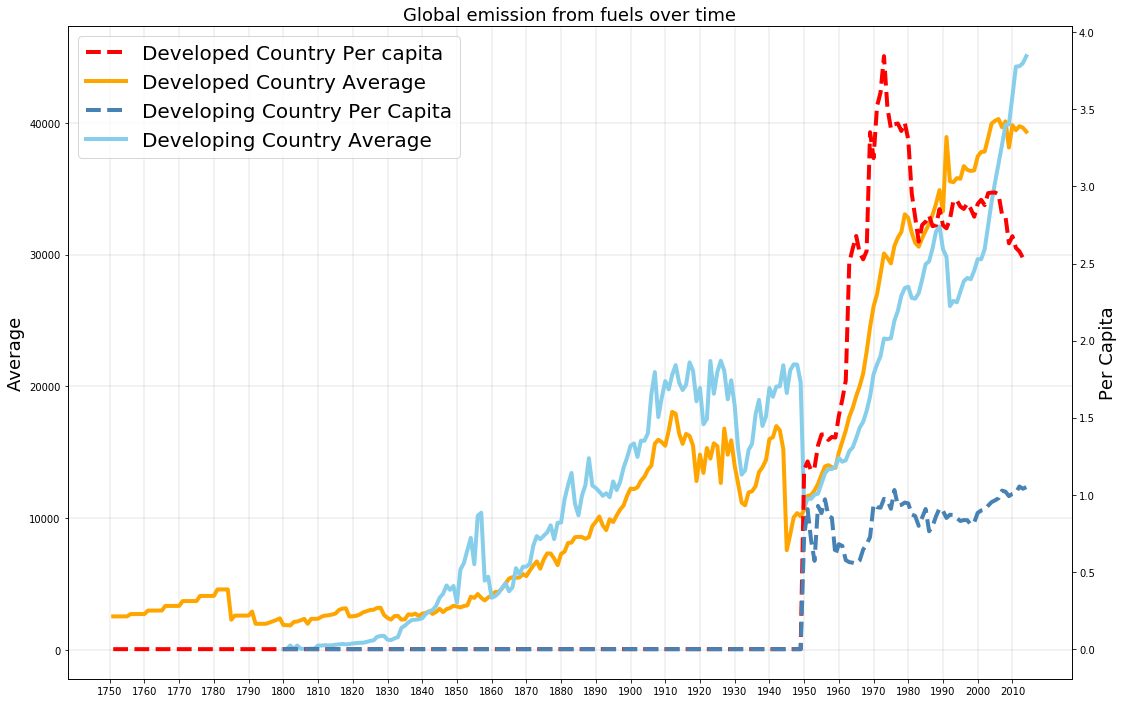

In [52]:
fig, ax = plt.subplots(figsize=(18,12))
ax.grid(linewidth='0.1', color='black')
ax.set_title('Global emission from fuels over time',size =18)
plt.xticks(np.arange(1750, 2015, 10)) 
ax2 = ax.twinx()
ax.set_ylabel('Average', fontsize = 18)
ax2.set_ylabel('Per Capita', fontsize = 18)
a, = ax2.plot(developed_by_year_mean.index,developed_by_year_mean['Per Capita'],linestyle='dashed',color='red',linewidth=4)
b, = ax.plot(developed_by_year_mean.index, developed_by_year_mean['Total'],linewidth=4,color = "orange")
c, = ax2.plot(developing_by_year_mean.index,developing_by_year_mean['Per Capita'],linestyle='dashed',color='steelblue',linewidth=4)
d, = ax.plot(developing_by_year_mean.index, developing_by_year_mean['Total'],linewidth=4, color = "skyblue")
plt.legend(prop={'size': 20},loc = "upper left",handles = (a, b, c, d), labels= ("Developed Country Per capita", 
                                                                                 "Developed Country Average",                                                                   "Developing Country Per Capita",
                                                                                 "Developing Country Average"))
plt.show()

In [12]:
sources = [['Coal',216], ['Diesel Fuel&Heating Oil',161.3], ['Gasolin(without ethanol)',157.2], ['Propane',139], ['Natural Gas',117]]
df = pd.DataFrame(sources, columns = ['Sources', 'Emission per power unit']) 
df

Sources  Emission per power unit
0                      Coal                    216.0
1   Diesel Fuel&Heating Oil                    161.3
2  Gasolin(without ethanol)                    157.2
3                   Propane                    139.0
4               Natural Gas                    117.0

                                                 Developed  vs. Devloping


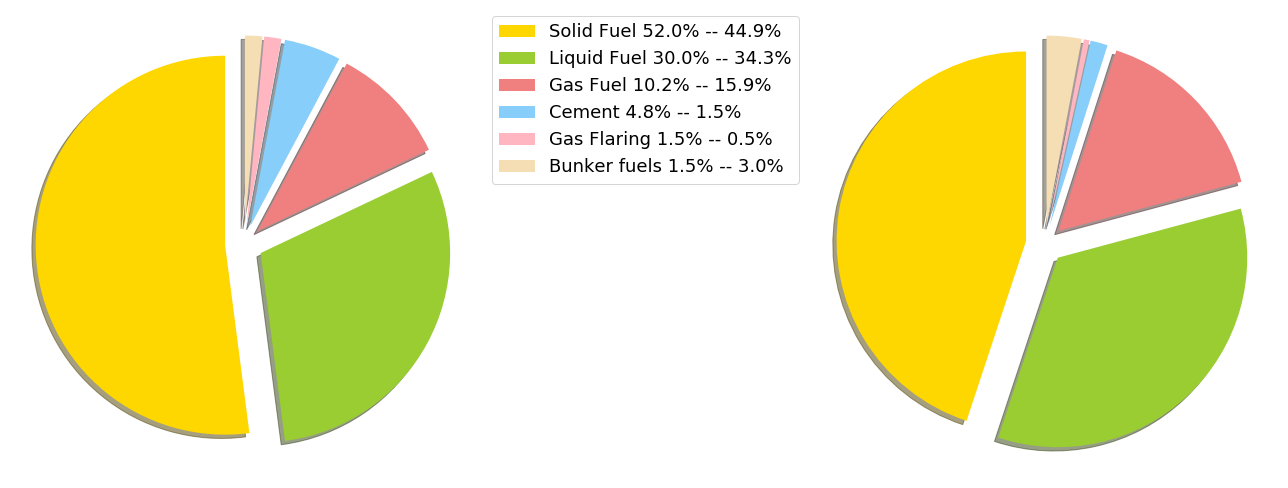

In [21]:
print("                                                 Developed  vs. Devloping")
labels1 = 'Solid Fuel 52.0% -- 44.9%', 'Liquid Fuel 30.0% -- 34.3%', 'Gas Fuel 10.2% -- 15.9%', 'Cement 4.8% -- 1.5%','Gas Flaring 1.5% -- 0.5%','Bunker fuels 1.5% -- 3.0%'
sizes = [79043638/151864310, 45552008/151864310, 15453809/151864310, 7349987/151864310, 2222815/151864310, 2242157/151864310]
sizes2 = [111716344/248735753,85223119/248735753,39512268/248735753,3651850/248735753,1218734/248735753,7413460/248735753]
explodes = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, (ax, ax2) = plt.subplots(ncols=2,figsize = (18,12))

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue',"lightpink","wheat"]

ax2.pie(sizes2,  colors = colors,explode=explodes,textprops = dict(color="black"), shadow=True, startangle=90)
ax.pie(sizes, colors = colors, explode=explodes,textprops = dict(color="black"), shadow=True,startangle=90)
plt.legend(labels1,prop={'size': 18}, bbox_to_anchor=[0.0,1])


plt.subplots_adjust(wspace=0.0, hspace=0, right=0.3)
plt.tight_layout()
plt.show()

From the graph above we can see that developed countries have a stronger dependence on solid fuel which is mostly the coal and produces the highest carbon emission per power unit, which is shown by the line graph above.

## 4. Data Analysis -- Regression and Prediction 
###   4.1 Temperature Data
       First, we want to do regression on the temperature data and predict the temperature to 2100.

In [22]:
land_temp_year = land_temp.copy()
land_temp_year = land_temp.groupby(["index"]).mean()
land_temp_year = land_temp_year.reset_index()

In [23]:
# Drop data with missing values  
land_temp_year_noNAN=land_temp_year[['index','LandMaxTemperature']]
land_temp_year_noNAN=land_temp_year_noNAN.dropna()

land_temp_year_noNAN2=land_temp_year[['index','LandMaxTemperatureUncertainty']]
land_temp_year_noNAN2=land_temp_year_noNAN2.dropna()

land_temp_year_noNAN3=land_temp_year[['index','LandMinTemperature']]
land_temp_year_noNAN3=land_temp_year_noNAN3.dropna()

land_temp_year_noNAN4=land_temp_year[['index','LandMinTemperatureUncertainty']]
land_temp_year_noNAN4=land_temp_year_noNAN4.dropna()

land_temp_year_noNAN5=land_temp_year[['index','LandAndOceanAverageTemperature']]
land_temp_year_noNAN5=land_temp_year_noNAN5.dropna()

land_temp_year_noNAN6=land_temp_year[['index','LandAndOceanAverageTemperatureUncertainty']]
land_temp_year_noNAN6=land_temp_year_noNAN6.dropna()

In [24]:
land_temp_year

index  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750                8.719364                           2.637818   
1     1751                7.976143                           2.781143   
2     1752                5.779833                           2.977000   
3     1753                8.388083                           3.176000   
4     1754                8.469333                           3.494250   
..     ...                     ...                                ...   
261   2011                9.516000                           0.082000   
262   2012                9.507333                           0.083417   
263   2013                9.606500                           0.097667   
264   2014                9.570667                           0.090167   
265   2015                9.831000                           0.092167   

     LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                   NaN                            NaN                 NaN   
1                   NaN                            NaN                 NaN   
2                   NaN                            NaN                 NaN   
3                   NaN                            NaN                 NaN   
4                   NaN                            NaN                 NaN   
..                  ...                            ...                 ...   
261           15.284833                       0.114333            3.827667   
262           15.332833                       0.107333            3.756167   
263           15.373833                       0.115500            3.911333   
264           15.313583                       0.111667            3.877750   
265           15.572667                       0.106500            4.148833   

     LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                              NaN                             NaN   
..                             ...                             ...   
261                       0.136583                       15.769500   
262                       0.145333                       15.802333   
263                       0.149833                       15.854417   
264                       0.139000                       15.913000   
265                       0.141750                       16.058583   

     LandAndOceanAverageTemperatureUncertainty  
0                                          NaN  
1                                          NaN  
2                                          NaN  
3                                          NaN  
4                                          NaN  
..                                         ...  
261                                   0.059000  
262                                   0.061500  
263                                   0.064667  
264                                   0.063167  
265                                   0.060833  

[266 rows x 9 columns]

In [25]:
X4=land_temp_year['index']
y4=land_temp_year['LandAverageTemperatureUncertainty']
X4 = sm.add_constant(X4)
model = sm.OLS(y4, X4).fit()
X3=land_temp_year['index']
y3=land_temp_year['LandAverageTemperature']
X3 = sm.add_constant(X3)
model = sm.OLS(y3, X3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     LandAverageTemperature   R-squared:                       0.387
Model:                                OLS   Adj. R-squared:                  0.385
Method:                     Least Squares   F-statistic:                     166.9
Date:                    Mon, 16 Dec 2019   Prob (F-statistic):           6.47e-30
Time:                            03:57:17   Log-Likelihood:                -169.13
No. Observations:                     266   AIC:                             342.3
Df Residuals:                         264   BIC:                             349.4
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5381      0.690     -0.780      0.436      -1.897       0.821
index          0.0047      0.000     12.918      0.000       0.004       0.005
==============================================================================
Omnibus:                       11.473   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               25.247
Skew:                          -0.025   Prob(JB):                     3.29e-06
Kurtosis:                       4.508   Cond. No.                     4.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X6=land_temp_year_noNAN2['index']
y6=land_temp_year_noNAN2['LandMaxTemperatureUncertainty']
X6 = sm.add_constant(X6)
model = sm.OLS(y6, X6).fit()
X5=land_temp_year_noNAN['index']
y5=land_temp_year_noNAN['LandMaxTemperature']
X5 = sm.add_constant(X5)
model = sm.OLS(y5, X5).fit()
X8=land_temp_year_noNAN4['index']
y8=land_temp_year_noNAN4['LandMinTemperatureUncertainty']
X8 = sm.add_constant(X8)
model = sm.OLS(y8, X8).fit()
X7=land_temp_year_noNAN3['index']
y7=land_temp_year_noNAN3['LandMinTemperature']
X7 = sm.add_constant(X7)
model = sm.OLS(y7, X7).fit()
X10=land_temp_year_noNAN6['index']
y10=land_temp_year_noNAN6['LandAndOceanAverageTemperatureUncertainty']
X10 = sm.add_constant(X10)
model = sm.OLS(y10, X10).fit()
X9=land_temp_year_noNAN5['index']
y9=land_temp_year_noNAN5['LandAndOceanAverageTemperature']
X9 = sm.add_constant(X9)
model = sm.OLS(y9, X9).fit()

Now we are going to linear regression to predict land average temperature, land average temperature uncertainty,
land max temperature, land max temperature uncertainty, land min temperature, land min temperature uncertainty,
land and ocean average temperature, and land and ocean average temperature uncertainty
based year.

In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

Getting linear regression equation for land average temperature

In [29]:
X = land_temp_year['index'].values.reshape(-1,1)
y = land_temp_year['LandAverageTemperature'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print('this is the intercept for LandAverageTemperature:')
print(regressor.intercept_)
#For retrieving the slope:
print('this is the slope for LandAverageTemperature:')
print(regressor.coef_)

this is the intercept for LandAverageTemperature:
[-0.95858794]
this is the slope for LandAverageTemperature:
[[0.00496141]]


Plotting the actual values and prediction equation

In [30]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.T

0         1         2         3         4         5   \
Actual     8.242417  7.718667  8.165417  6.743583  8.698333  8.422167   
Predicted  8.611963  8.086054  8.527619  7.763562  8.651654  8.582194   

                 6        7         8         9   ...        44        45  \
Actual     8.552750  8.02275  8.365250  8.350333  ...  8.626250  8.355583   
Predicted  8.200166  8.18032  8.716152  7.947134  ...  8.740959  7.748678   

                 46        47        48        49        50        51  \
Actual     8.193500  8.760333  7.591750  8.606500  8.994417  8.409667   
Predicted  7.833022  8.661577  8.041401  7.783408  8.899724  8.785612   

                 52        53  
Actual     7.739917  8.595083  
Predicted  8.036440  8.810419  

[2 rows x 54 columns]

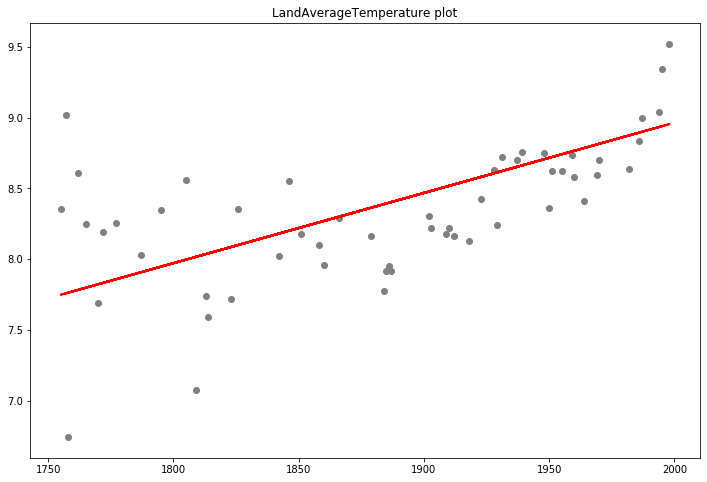

In [31]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('LandAverageTemperature plot')
plt.show()

Getting linear regression equation for land average temperature uncertainty

In [32]:
X = land_temp_year['index'].values.reshape(-1,1)
y = land_temp_year['LandAverageTemperatureUncertainty'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print('this is the intercept for LandAverageTemperatureUncertainty:')
print(regressor.intercept_)
print('this is the slope for LandAverageTemperatureUncertainty:')
print(regressor.coef_)

this is the intercept for LandAverageTemperatureUncertainty:
[22.06787522]
this is the slope for LandAverageTemperatureUncertainty:
[[-0.01122376]]


Plotting the actual values and prediction equation

In [33]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

Actual  Predicted
0   0.251750   0.417249
1   1.362250   1.606967
2   0.258417   0.608053
3   3.362917   2.336511
4   0.240083   0.327459
5   0.253083   0.484591
6   1.051750   1.348821
7   0.897500   1.393716
8   0.186333   0.181550
9   2.043333   1.921232
10  0.184167   0.170326
11  2.135417   1.764100
12  0.262750   0.641724
13  0.290000   0.709067
14  0.085000  -0.222505
15  2.427750   2.257945
16  0.392083   0.888647
17  0.260083   0.630500
18  0.248583   0.428473
19  1.688917   1.808995
20  0.209583   0.203997
21  0.606000   1.124346
22  0.075583  -0.042925
23  4.026000   2.347735
24  0.396250   0.922318
25  0.386000   0.899870
26  0.626000   1.191688
27  0.073917  -0.357190
28  0.292750   0.720290
29  0.076417  -0.323519
30  0.425000   0.911094
31  0.268250   0.540710
32  0.070917  -0.312295
33  0.881917   1.292702
34  2.442833   2.123260
35  0.699750   1.214136
36  0.107167   0.080536
37  2.361750   2.011022
38  0.463417   0.978437
39  2.780667   2.201826
40  0.093500   0.069312
41  0.082667  -0.177610
42  1.559583   1.573296
43  0.237750   0.394801
44  0.153583   0.125431
45  3.850333   2.370183
46  2.463833   2.179379
47  0.237333   0.305011
48  2.168500   1.707981
49  3.524250   2.291616
50  0.085167  -0.233729
51  0.092500   0.024417
52  1.708833   1.719205
53  0.085167  -0.031701

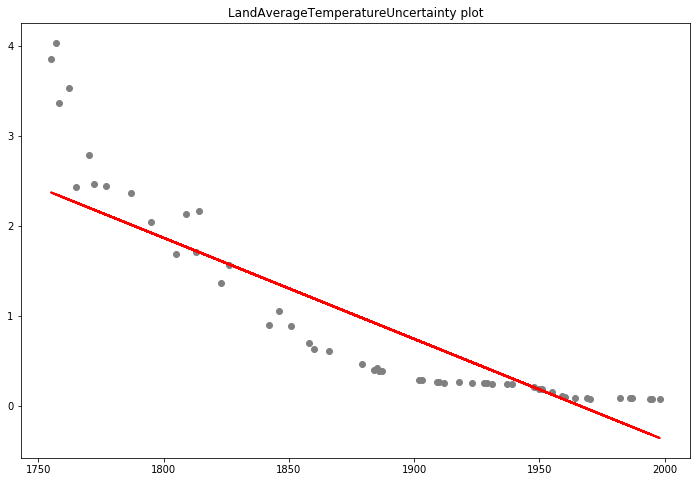

In [34]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('LandAverageTemperatureUncertainty plot')
plt.show()

Getting linear regression equation for max land temperature

In [35]:
X = land_temp_year_noNAN['index'].values.reshape(-1,1)
y = land_temp_year_noNAN['LandMaxTemperature'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print('this is the intercept for LandMaxTemperature:')
print(regressor.intercept_)
print('this is the intercept for LandMaxTemperature:')
print(regressor.coef_)

this is the intercept for LandMaxTemperature:
[-0.16138063]
this is the intercept for LandMaxTemperature:
[[0.00751986]]


Plotting the actual values and prediction equation

In [36]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.T

0          1          2          3          4          5   \
Actual     15.373833  14.342667  14.603000  14.082167  14.982750  14.063667   
Predicted  14.976105  14.758029  14.449715  14.163960  14.870827  14.156440   

                  6          7          8          9   ...         24  \
Actual     13.437583  13.493167  14.267167  13.987833  ...  13.934833   
Predicted  13.803006  13.787967  14.765549  14.209079  ...  13.945884   

                  25         26         27         28         29         30  \
Actual     15.249333  14.023667  13.683000  14.181750  13.890083  14.040500   
Predicted  14.900907  14.547473  13.810526  14.299317  14.028602  14.081241   

                  31         32         33  
Actual     14.481500  15.312333  14.097333  
Predicted  14.472274  14.893387  14.201559  

[2 rows x 34 columns]

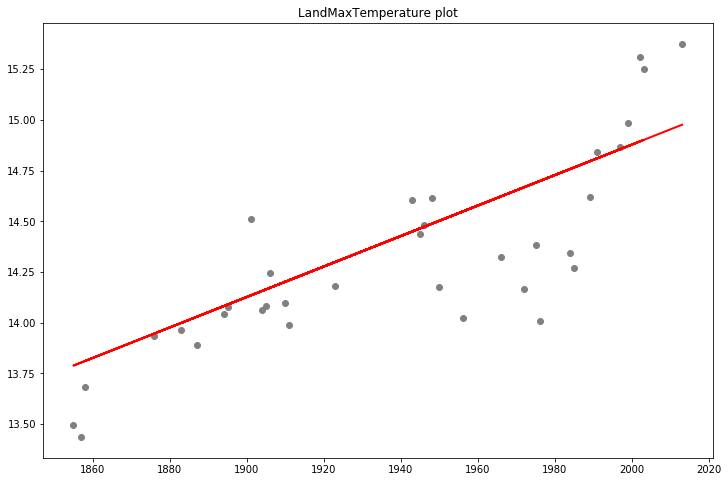

In [37]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('LandMaxTemperature plot')
plt.show()

Getting the linear regression equation for max land temperature uncertainty

In [38]:
X = land_temp_year_noNAN2['index'].values.reshape(-1,1)
y = land_temp_year_noNAN2['LandMaxTemperatureUncertainty'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print('this is the intercept for LandMaxTemperatureUncertainty')
print(regressor.intercept_)
print('this is the slope for LandMaxTemperatureUncertainty')
print(regressor.coef_)

this is the intercept for LandMaxTemperatureUncertainty
[18.36401882]
this is the slope for LandMaxTemperatureUncertainty
[[-0.00925187]]


Plotting the actual values and prediction equation

In [39]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.T

0         1         2         3         4         5   \
Actual     0.115500  0.134083  0.225917  0.369500  0.096750  0.500000   
Predicted -0.259988  0.008316  0.387642  0.739213 -0.130462  0.748465   

                 6         7         8         9   ...        24       25  \
Actual     2.179167  1.331417  0.119667  0.337750  ...  0.805000  0.11375   
Predicted  1.183303  1.201807 -0.000936  0.683702  ...  1.007517 -0.16747   

                 26        27       28        29        30        31  \
Actual     0.161833  1.870000  0.28475  0.588833  0.425250  0.214833   
Predicted  0.267368  1.174051  0.57268  0.905747  0.840984  0.359887   

                 32        33  
Actual     0.124083  0.330250  
Predicted -0.158218  0.692954  

[2 rows x 34 columns]

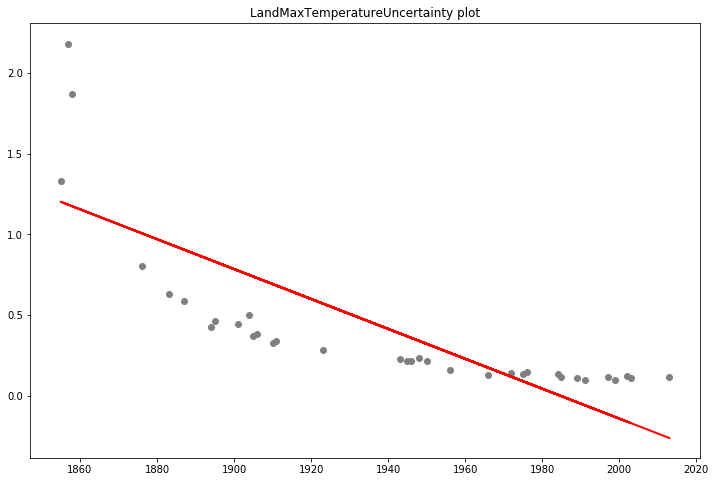

In [40]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('LandMaxTemperatureUncertainty plot')
plt.show()

In [41]:
X = land_temp_year_noNAN3['index'].values.reshape(-1,1)
y = land_temp_year_noNAN3['LandMinTemperature'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print('this is the intercept for LandMinTemperature:')
print(regressor.intercept_)
print('this is the slope for LandMinTemperature:')
print(regressor.coef_)

this is the intercept for LandMinTemperature:
[-19.02033275]
this is the slope for LandMinTemperature:
[[0.0112738]]


In [42]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.T

0         1         2         3         4         5   \
Actual     3.911333  3.186750  2.936583  2.343250  3.662333  2.171083   
Predicted  3.673836  3.346895  2.884669  2.456265  3.516002  2.444991   

                 6         7         8         9   ...        24        25  \
Actual     1.856833  1.702833  3.175667  2.250167  ...  2.134667  3.851583   
Predicted  1.915122  1.892574  3.358169  2.523907  ...  2.129324  3.561097   

                 26        27        28        29        30        31  \
Actual     2.561750  2.110750  2.456250  1.906917  2.123750  2.830583   
Predicted  3.031229  1.926396  2.659193  2.253336  2.332253  2.918491   

                 32        33  
Actual     3.864583  2.157667  
Predicted  3.549824  2.512634  

[2 rows x 34 columns]

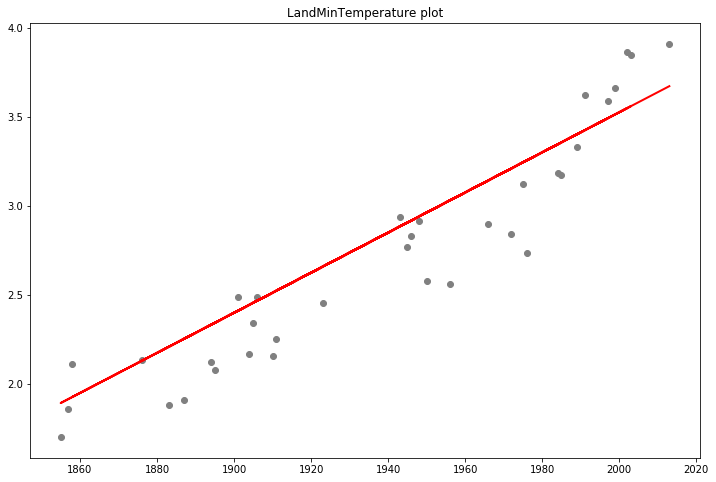

In [43]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('LandMinTemperature plot')
plt.show()

In [44]:
X = land_temp_year_noNAN4['index'].values.reshape(-1,1)
y = land_temp_year_noNAN4['LandMinTemperatureUncertainty'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print('this is the intercept for LandMinTemperatureUncertainty:')
print(regressor.intercept_)
print('this is the slope for LandMinTemperatureUncertainty:')
print(regressor.coef_)

this is the intercept for LandMinTemperatureUncertainty:
[14.29283722]
this is the slope for LandMinTemperatureUncertainty:
[[-0.00717104]]


Plotting the actual values and prediction equation

In [45]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.T

0         1         2         3         4         5   \
Actual     0.149833  0.130333  0.245167  0.377583  0.113500  0.337750   
Predicted -0.142457  0.065503  0.359516  0.632015 -0.042062  0.639186   

                 6         7         8         9   ...        24        25  \
Actual     1.591167  1.655333  0.105417  0.310250  ...  0.870833  0.126167   
Predicted  0.976225  0.990567  0.058332  0.588989  ...  0.839975 -0.070746   

                 26        27        28        29        30        31  \
Actual     0.203500  1.224333  0.289833  0.555583  0.417167  0.254583   
Predicted  0.266292  0.969054  0.502936  0.761094  0.710896  0.338003   

                 32       33  
Actual     0.117167  0.42475  
Predicted -0.063575  0.59616  

[2 rows x 34 columns]

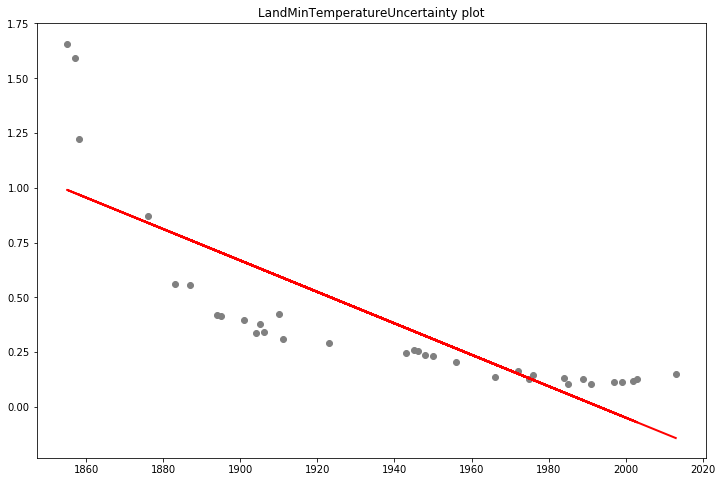

In [46]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('LandMinTemperatureUncertainty plot')
plt.show()

In [201]:
X = land_temp_year_noNAN5['index'].values.reshape(-1,1)
y = land_temp_year_noNAN5['LandAndOceanAverageTemperature'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print('this is the intercept for LandAndOceanAverageTemperature:')
print(regressor.intercept_)
print('this is the slope for LandAndOceanAverageTemperature:')
print(regressor.coef_)

this is the intercept for LandAndOceanAverageTemperature:
[5.03304052]
this is the slope for LandAndOceanAverageTemperature:
[[0.00527395]]


Plotting the actual values and prediction equation

In [53]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

Actual  Predicted
0  0.149833  -0.142457
1  0.130333   0.065503
2  0.245167   0.359516
3  0.377583   0.632015
4  0.113500  -0.042062

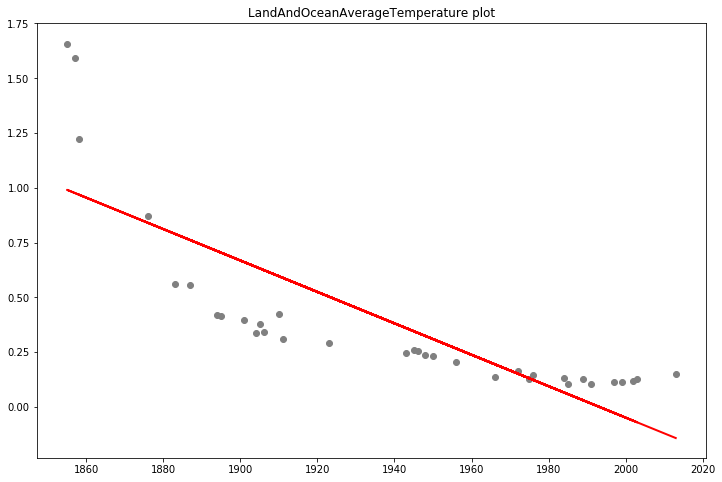

In [47]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('LandAndOceanAverageTemperature plot')
plt.show()

In [204]:
X = land_temp_year_noNAN6['index'].values.reshape(-1,1)
y = land_temp_year_noNAN6['LandAndOceanAverageTemperatureUncertainty'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
print('this is the intercept for LandAndOceanAverageTemperatureUncertainty:')
print(regressor.intercept_)
print('this is the slope for LandAndOceanAverageTemperatureUncertainty:')
print(regressor.coef_)

this is the intercept for LandAndOceanAverageTemperatureUncertainty:
[2.8227196]
this is the slope for LandAndOceanAverageTemperatureUncertainty:
[[-0.00139364]]


Plotting the actual values and prediction equation

In [54]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

Actual  Predicted
0  0.149833  -0.142457
1  0.130333   0.065503
2  0.245167   0.359516
3  0.377583   0.632015
4  0.113500  -0.042062

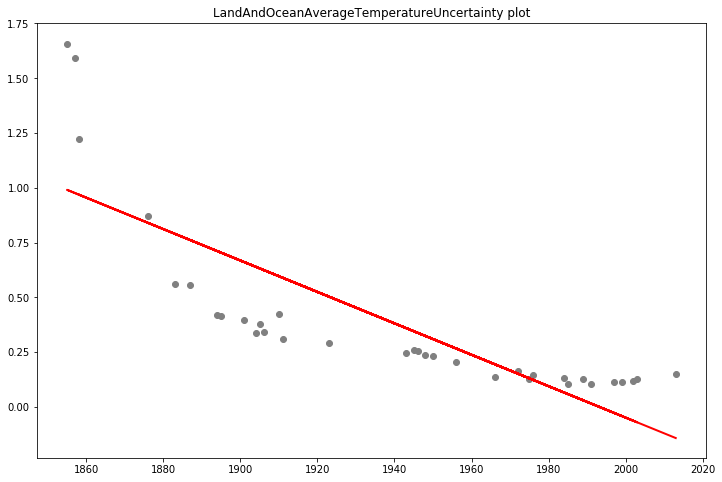

In [48]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('LandAndOceanAverageTemperatureUncertainty plot')
plt.show()

From all these plots, there shows a clear trend in increasing temperature, whether it is land or land and ocean temperature, or increase in min and max temperature, as well as decrease in uncertainty for all these terms, meaning they are becoming more and more accurate as years increase.

As evident by the LandAverageTemperature and LandAndOceanAverageTemperature plot, it is clear that temperature for both the world's land and ocean has steadily increased as years increased. Therefore, temperatures can be expected to increase, thus making the need to decrease fossil fuel emmissions more and more important. Meanwhile the corresponding LandAverageTemperatureUncertainty plot and LandAndOceanAverageTemperatureUncertainty plot has steadily decreased as years increased. 

As evident by the LandMaxTemperature plot and LandMinTemperature plot, both the max and min land temperature have increased, and their corresponding LandMaxTemperatureUncertainty plot and LandMinTemperatureUncertainty plot have increased, showing that as the max and min temperatures for each year increase, so does the accuracy of them.

Therefore, the predictions of land and ocean temperatures are getting more and more accurate, thus furthering evidence against climate change skeptics who claim that temperature predictions are inaccurate or not rising.  

### Predicting trends up to the year 2060
Now we will plot all the prediction equations to see which one is increasing the most and how to predictions will look in around 70 years so we can get a better understanding  of what our global average temperature's will be. 

We will create 2 graph functions, one (graph) will be used to plot all 8 regression equations from earlier, while the other one (graph2) will plot developing versus developed countries emission predictions so we can see what the disparity of emissions between developing and developed countries. 

In [73]:
#function that will graph predictions
def graph(formula,formula2,formula3,formula4,formula5,formula6,formula7,formula8,x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    y2 = eval(formula2)
    y3 = eval(formula3)
    y4 = eval(formula4)
    y5 = eval(formula5)
    y6 = eval(formula6)
    y7 = eval(formula7)
    y8 = eval(formula8)
    fig = plt.figure(figsize=(12,8))
    a, = plt.plot(x, y,linewidth = 3)
    b, = plt.plot(x, y2,linewidth = 3)
    c, = plt.plot(x, y3,linewidth = 3)
    d, = plt.plot(x, y4,linewidth = 3)
    e, = plt.plot(x, y5,linewidth = 3)
    f, = plt.plot(x, y6,linewidth = 3)
    g, = plt.plot(x, y7,linewidth = 3)
    h, = plt.plot(x, y8,linewidth = 3)
    labels = ("LandAverageTemperature","LandAverageTemperatureUncertainty",
              "LandMaxTemperature","LandMaxTemperatureUncertainty","LandMinTemperature",
              "LandMinTemperatureUncertainty","LandAndOceanAverageTemperature","LandAndOceanAverageTemperatureUncertainty")
    plt.legend(prop={'size': 10},loc = "upper left",handles = (a, b, c, d, e, f, g, h), labels= labels)
    plt.show()

In [74]:
def graph2(formula,formula2,x_range):
    x = np.array(x_range)  
    y = eval(formula)
    y2 = eval(formula2)
    plt.plot(x, y,label="Developed countries emission prediction")
    plt.plot(x, y2,label="Developing countries emission prediction")
    plt.legend()
    plt.show()

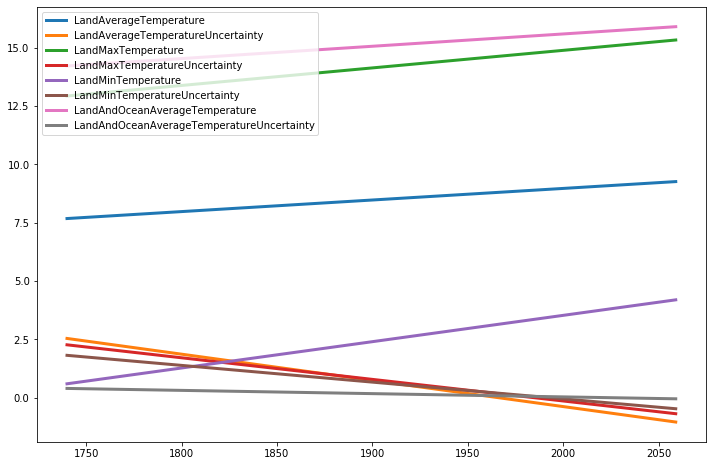

Predicted LandAverageTemperature in year 2060 will be:
9.26191666
Predicted LandAverageTemperatureUncertainty in year 2060 will be:
-1.0530703799999976
Predicted LandMaxTemperature in year 2060 will be:
15.329530969999999
Predicted LandMaxTemperatureUncertainty in year 2060 will be:
-0.6948333800000022
Predicted LandMinTemperature in year 2060 will be:
4.203695249999999
Predicted LandMinTemperatureUncertainty in year 2060 will be:
-0.4795051800000003
Predicted LandAndOceanAverageTemperature in year 2060 will be:
15.897377520000001
Predicted LandAndOceanAverageTemperatureUncertainty in year 2060 will be:
-0.04817880000000008


In [75]:
#graphing predictions for up to year 2060
graph('0.00496141*x-0.95858794',
      '-0.01122376*x+22.06787522',
      '0.00751986*x-0.16138063',
      '-0.00925187*x+18.36401882',
      '0.0112738*x-19.02033275',
      '-0.00717104*x+14.29283722',
      '0.00527395*x+5.03304052',
      '-0.00139364*x+2.8227196',range(1740,2060))
#printing expected values for year 2060
x=2060
print('Predicted LandAverageTemperature in year 2060 will be:')
print(eval('0.00496141*x-0.95858794'))

print('Predicted LandAverageTemperatureUncertainty in year 2060 will be:')
print(eval('-0.01122376*x+22.06787522'))

print('Predicted LandMaxTemperature in year 2060 will be:')
print(eval('0.00751986*x-0.16138063'))

print('Predicted LandMaxTemperatureUncertainty in year 2060 will be:')
print(eval('-0.00925187*x+18.36401882'))

print('Predicted LandMinTemperature in year 2060 will be:')
print(eval('0.0112738*x-19.02033275'))

print('Predicted LandMinTemperatureUncertainty in year 2060 will be:')
print(eval('-0.00717104*x+14.29283722'))

print('Predicted LandAndOceanAverageTemperature in year 2060 will be:')
print(eval('0.00527395*x+5.03304052'))

print('Predicted LandAndOceanAverageTemperatureUncertainty in year 2060 will be:')
print(eval('-0.00139364*x+2.8227196'))

As shown from the predicted values, by 2060, land and ocean average temperature will continue to be the highest, followed by the maximum land temperature, followed by the land average temperature.

### 4.2 Developing vs. Developed Countries Emissions 
    
Now we will take a look at developing versus developed countries CO2 emissions from fossil fuels to see if there is still a disparity between their emissions or if they have caught up to eachother. 

In [80]:
#getting the mean of the developing countries by year 
fuel_developing_mean=fuel_developing
fuel_developing_mean=fuel_developing_mean.groupby(['Year']).mean()
fuel_developing_mean=fuel_developing_mean.reset_index()
fuel_developing_mean.head()

Year  index  Total  Solid Fuel  Liquid Fuel  Gas Fuel  Cement  Gas Flaring  \
0  1800   76.0   69.0        69.0          0.0       0.0     0.0          0.0   
1  1801   81.0   73.0        73.0          0.0       0.0     0.0          0.0   
2  1802   86.0  345.0       345.0          0.0       0.0     0.0          0.0   
3  1803   93.0   81.0        81.0          0.0       0.0     0.0          0.0   
4  1804   97.0  342.5       342.5          0.0       0.0     0.0          0.0   

   Per Capita  Bunker fuels  Developed  
0         0.0           0.0      False  
1         0.0           0.0      False  
2         0.0           0.0      False  
3         0.0           0.0      False  
4         0.0           0.0      False

In [97]:
#getting the mean of the developed countries by year 
fuel_developed_mean=fuel_developed
fuel_developed_mean=fuel_developed_mean.groupby(['Year']).mean()
fuel_developed_mean=fuel_developed_mean.reset_index()
fuel_developed_mean.head()

Year  index   Total  Solid Fuel  Liquid Fuel  Gas Fuel  Cement  \
0  1751    0.0  2552.0      2552.0          0.0       0.0     0.0   
1  1752    1.0  2553.0      2553.0          0.0       0.0     0.0   
2  1753    2.0  2553.0      2553.0          0.0       0.0     0.0   
3  1754    3.0  2554.0      2554.0          0.0       0.0     0.0   
4  1755    4.0  2555.0      2555.0          0.0       0.0     0.0   

   Gas Flaring  Per Capita  Bunker fuels  Developed  
0          0.0         0.0           0.0       True  
1          0.0         0.0           0.0       True  
2          0.0         0.0           0.0       True  
3          0.0         0.0           0.0       True  
4          0.0         0.0           0.0       True

Since it appears that both developing and especially developed countries are increasing their emissions, we will use a polynomial fit to see how well it fits the data. 

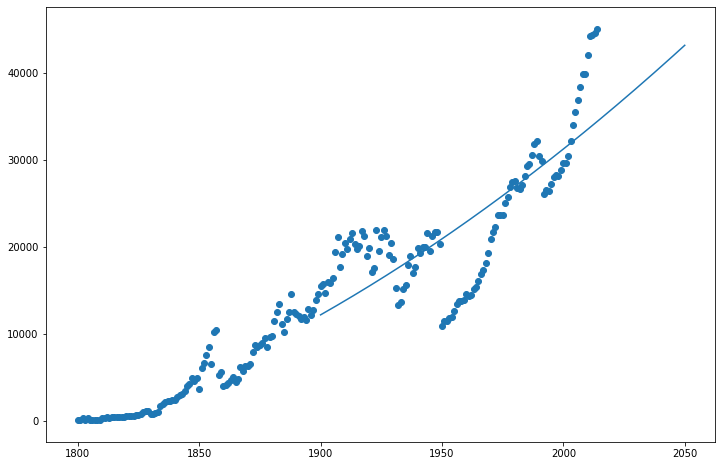

In [101]:
from sklearn.preprocessing import PolynomialFeatures
X=fuel_developing_mean[['Year']]
#starting polynomial regression at 1900 since thats when fuel start to increase
X=X-1900
y=fuel_developing_mean['Total']
poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(poly_X,y)

coefs = poly_model.coef_
years = np.linspace(0, 150, 156).reshape(-1, 1)
poly_years = poly.fit_transform(years)
years = years+1900
predictions = poly_model.predict(poly_years)

fig = plt.figure(figsize=(12,8))
plt.plot(years, predictions)
plt.scatter(y=fuel_developing_mean['Total'], x=fuel_developing_mean['Year'])

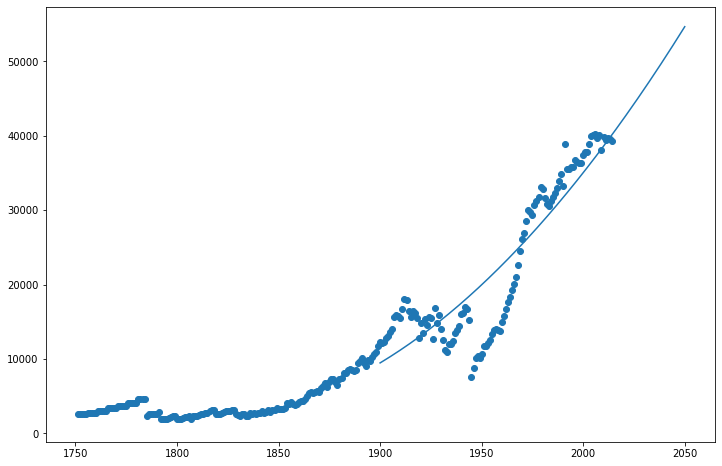

In [102]:
X=fuel_developed_mean[['Year']]
#starting polynomial regression at 1900 since thats when fuel start to increase
X=X-1900
y=fuel_developed_mean['Total']
poly = PolynomialFeatures(degree=2)
poly_X = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(poly_X,y)

coefs = poly_model.coef_
years = np.linspace(0, 150, 156).reshape(-1, 1)
poly_years = poly.fit_transform(years)
years = years+1900
predictions = poly_model.predict(poly_years)

fig = plt.figure(figsize=(12,8))
plt.plot(years, predictions)
plt.scatter(y=fuel_developed_mean['Total'], x=fuel_developed_mean['Year'])

As seen from both polynomial regression fits, both country groups are continuously increasing and well approximated by the 2 polynomial degree. The developed countries are very well fitted, while the approximation for developed countries is actually underfitted. This is not good since it shows the developed and developing countries emissions are getting closer to each other since they both keep increasing at a high rate, developed countrie's value is over 50,000 around 2050 while developing countrie's values may be around 40,000 to 50,000. There are also more developed countries than developing, so it should be concerning that they are producing around the same number of emissions, thus showing that wealthier, developed countries need to lower their emissions.

### 4.3 Hypothesis -- Possible correlations between temperature and carbon emission
After prediction and regression of both temperature and carbon emissions, we want to analyze the possible correlation between them. By getting an extremely small p-value in the following test, we can reject null hypothesis and find a strong correlation between them.

In [81]:
from scipy.stats import pearsonr
carbon = carbon_world[carbon_world.index == 227].T
carbon = carbon.drop(['2017']).drop(['2016'])
temp = land_temp['LandAverageTemperature'][0:]
temp = temp.tolist()[2:]
carbon = carbon.T.values.tolist()[0][1:]
pearsons_r, p_value = pearsonr(temp, carbon)
print("Pearson's r value for carbon emission vs temperature: {}".format(pearsons_r))
print("p-value for carbon emission vs temperature: {}".format(p_value))

Pearson's r value for carbon emission vs temperature: 0.7094661646945246
p-value for carbon emission vs temperature: 1.0551921471428169e-41


## 5. Machine learning algorithms application
### 5.1 Classification by country
Since we have derived correlations between fossil fuels, carbon emissions and temperatures, we notice that global data ignores differences between nations. To inspect if each country possesses some charicteristics in terms of other factors, we could try to classify and predict it to see how well the performance can be .Therefore, a model of classification using random forest is trained to predict the country using other variables.

In [113]:
d = fuel_df.copy()

# Use country as target variable and RandomForest for classification 
l=LabelEncoder()
y=l.fit_transform(d["Country"])

del d["Country"]
del d["Year"]

s=StandardScaler()
s.fit(d)

d=s.fit_transform(d)

feature_train, feature_test, target_train, target_test = train_test_split(d, y, test_size=0.3,random_state=0)
clf = RandomForestClassifier()
clf.fit(feature_train,target_train)
predict=clf.predict(feature_test)
print("accuracy_score")
print(accuracy_score(predict, target_test))
print("classification report")
print(classification_report(target_test, predict))
d1=pd.DataFrame([target_test,predict]).T
d1.columns = ["Actual","Predicted"]
d1

accuracy_score
0.7578336557059961
classification report
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.70      0.84      0.76        25
           2       0.81      0.75      0.78        28
           3       0.73      1.00      0.84         8
           4       0.79      0.88      0.83        25
           5       0.70      1.00      0.82         7
           6       1.00      1.00      1.00         1
           7       0.75      0.63      0.69        19
           8       0.82      0.84      0.83        37
           9       1.00      1.00      1.00         2
          10       1.00      0.88      0.93         8
          11       0.62      0.64      0.63        53
          12       0.51      0.55      0.53        49
          13       1.00      1.00      1.00         7
          14       0.76      1.00      0.86        16
          15       0.91      0.74      0.82        27
          16       1.00  

Actual  Predicted
0        134          4
1         74         74
2        190        190
3        144        144
4        126        126
...      ...        ...
5165     212        212
5166      74         74
5167      45         45
5168     182        182
5169     220        220

[5170 rows x 2 columns]

With an accuracy of around 0.75, we've trained a model of fine performance for classification with prediction examples shown above.

### 5.2 Prediction of economic status by gdp, carbon emission, population, electricity consumption
In addition to the above classification, with data of gdp, carbon emissions and electricity comsuption per capita, we hope to predict the economic status of a country maked by 1 = developed, 0 = developing similarly.
Additional data sources used:  [Electricity Consumption](https://www.indexmundi.com/map/?v=81000) , 
[Co2 emission per capita](https://ourworldindata.org/grapher/co-emissions-per-capita-vs-gdp-per-capita-international-)
   

In [123]:
# assign economic status to countries
data_countries.loc[data_countries['humanDevelopmentIndex']>=0.8,['humanDevelopmentIndex']] = 1
data_countries.loc[data_countries['humanDevelopmentIndex']<0.8,['humanDevelopmentIndex']] = 0
data_ele = pd.read_csv('elePer.csv')
data_ele.columns = ['name','elePer','year']
data_co2 = pd.read_csv('co-emissions-per-capita.csv')
# merge data
data = pd.merge(data_countries,data_ele,how='left')
data_co2 =data_co2.loc[data_co2['Year']==2017]
data_co2.columns = ['name','code','year','co2_per']
data_co2.drop(['code','year'], axis=1, inplace=True)
data_gdp = pd.read_csv('co-emissions-per-capita-vs-gdp-per-capita-international.csv')
data_gdp=data_gdp.loc[data_gdp['Year']==2016]
data_gdp.columns = ['name','code','year','co2_per','gdp_per','pop']
data_gdp.drop(['code','year','co2_per','pop'], axis=1, inplace=True)
data = pd.merge(data,data_co2,how='left')
data = pd.merge(data,data_gdp,how='left')
label = [int(i) for i in data['humanDevelopmentIndex']]
data['label'] = label
data.drop(['humanDevelopmentIndex','year'],inplace=True,axis=1)
data.dropna(axis=0,how='any',inplace=True)
data.head()

name    pop2019   elePer    co2_per  gdp_per  label
0       Norway   5378.857  25019.0   8.442342  82814.0      1
1  Switzerland   8591.365   7097.0   4.727938  59662.0      1
2    Australia  25203.198   9624.0  16.895017  48845.0      1
3      Ireland   4882.495   4747.0   8.345489  56597.0      1
4      Germany  83517.045   6385.0   9.734893  44689.0      1

In [121]:
data = np.asarray(data)
np.random.shuffle(data)
x = data[:,1:-1]
y = data[:,-1]
trainx,testx,trainy,testy = train_test_split(x,y,test_size=0.2,stratify=y)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainx,list(trainy))
y_pred = clf.predict(testx)
print("accuracy score")
print (accuracy_score(y_true = list(testy),y_pred = y_pred)) 
print("classification report")
print(classification_report(y_pred = y_pred,y_true = list(testy)))
d1=pd.DataFrame([list(testy),y_pred]).T
d1.columns = ["Actual","Predicted"]
d1

accuracy score
0.9333333333333333
classification report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Actual  Predicted
0        0          0
1        0          0
2        1          1
3        0          0
4        0          1
5        0          0
6        0          0
7        0          0
8        0          0
9        1          0
10       1          1
11       0          0
12       0          0
13       0          0
14       1          1
15       1          1
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       1          1
22       0          0
23       0          0
24       1          1
25       0          0
26       0          0
27       1          1
28       1          1
29       1          1

With an accuracy of around 0.93, we've trained a model of decent performance for classification with prediction examples shown above. Since the training process is relatively easy with a few steps, following hypothesis might be made and followed with verification.  

### 5.3 Related Hypotheses
We have hypothese regarding the correlation between CO2 emission per capita, and all gdp, eletricity consumption per capita, and population. We use Pearsons to test

In [131]:
#pop2019	elePer	co2_per	gdp_per	
pearsons_r, p_value = pearsonr(data['co2_per'], data['elePer'])
print("Pearson's r value for carbon emission per capita vs electricity consumption per capita: {}".format(pearsons_r))
print("p-value for carbon emission per capita vs electricity consumption per capita: {}".format(p_value))

pearsons_r, p_value = pearsonr(data['co2_per'], data['gdp_per'])
print("---------------------------------------------------------------------------------------------------")
print("Pearson's r value for carbon emission per capita vs gdp per capita: {}".format(pearsons_r))
print("p-value for carbon emission per capita vs gdp per capita: {}".format(p_value))

pearsons_r, p_value = pearsonr(data['co2_per'], data['pop2019'])
print("---------------------------------------------------------------------------------------------------")
print("Pearson's r value for carbon emission per capita vs population: {}".format(pearsons_r))
print("p-value for carbon emission per capita vs population: {}".format(p_value))

pearsons_r, p_value = pearsonr(data['co2_per'], data['label'])
print("---------------------------------------------------------------------------------------------------")
print("Pearson's r value for carbon emission per capita vs economic status: {}".format(pearsons_r))
print("p-value for carbon emission per capita vs economic status: {}".format(p_value))

Pearson's r value for carbon emission per capita vs electricity consumption per capita: 0.6034448567116644
p-value for carbon emission per capita vs electricity consumption per capita: 3.012890010316887e-16
---------------------------------------------------------------------------------------------------
Pearson's r value for carbon emission per capita vs gdp per capita: 0.8302906057658506
p-value for carbon emission per capita vs gdp per capita: 2.090593286157548e-39
---------------------------------------------------------------------------------------------------
Pearson's r value for carbon emission per capita vs population: -0.016597265349564152
p-value for carbon emission per capita vs population: 0.8402391727479036
---------------------------------------------------------------------------------------------------
Pearson's r value for carbon emission per capita vs economic status: 0.5487820254295774
p-value for carbon emission per capita vs economic status: 3.5815496977283173e-

From the results above, with extremely small p-value for gdp & electricity comsumption per capita and economic status of the country, we can reject the null hypothesis and a correlation is comfirmed for all three. However, with a p-value of 0.84, there is no correlation between population and CO2 carbon emission per capita.

## What would happen with rising temperature:
   [Why a half-degree temperature rise is a big deal](https://climate.nasa.gov/news/2458/why-a-half-degree-temperature-rise-is-a-big-deal/)<br>
### [Corn plants with no corn](https://climate.nasa.gov/news/2458/why-a-half-degree-temperature-rise-is-a-big-deal/)
<img src="https://climate.nasa.gov/system/news_items/main_images/2458_half-degree-triptych-v1-border.jpg" width="400" height="400" /> <br>

### [Polar bear with no ice](https://cottagelife.com/outdoors/how-global-warming-is-affecting-canadas-polar-bears/)
<img src="https://cottagelife.com/wp-content/uploads/2018/06/shutterstock_193652336-1200x799.jpg" width="400" height="400" />

### [Coral with no algae](https://www.climatecentral.org/gallery/graphics/rising-ocean-temps-can-kill-corals)
<img src="https://assets.climatecentral.org/images/made/2016WorldOceansDay_CoralBleaching_en_title_lg_900_506_s_c1_c_c.jpg" width="400" height="400" />


## Conclusion

From our analysis, we can see that while our general standard living conditions have increase with time, so have our use of fossil fuels, mainly CO2. Average temperatures for our land and ocean have increased drastically, and are predicted to only keep increasing. If we don't take actions in the future, rising temperatures will pose a threat to lifes living on earth.

Meanwhile, when comparing developed versus developing countries, 52 developed countries as currently making more emissions as 204 developing countries, and as seen by our polynomial fit, they are quickly catching up on increasing their emissions, as early as 2060. They also have a much higher carbon emission per capita, which might be the result of more "advanced" lifestyles. 

Disregarding any debates over climate change, the trends shown by data are undeniable. It is a worldwide problem faced by every human being. As one of the top countries that produce the most emissions, U.S. needs to find ways to cut back on emissions and help developing countries better their standard of living with less emissions. If not, the soar in the temperature shown in the prediction is what we'll face. To improve the situation better, actions should be taken worldwidely, nationally as well as personally, here are some <b> treaties agreed internationally: 

#### [Paris Agreement](https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement)<br>
#### [Kyoto Protocol](https://unfccc.int/process-and-meetings/the-kyoto-protocol/what-is-the-kyoto-protocol/kyoto-protocol-targets-for-the-first-commitment-period)<br>

<b>implemented nationally:<br>

#### [Federal Action on Climate](https://www.c2es.org/content/federal-action-on-climate/) <br>

<b> and what we can do personally! <br>

#### [How You Can Help Reduce Greenhouse Gas Emissions at Home](https://www.nps.gov/pore/learn/nature/climatechange_action_home.htm)<br>
#### [What Can I do about Climate Change](https://www.bbc.com/future/article/20181102-what-can-i-do-about-climate-change)<br>


<img src="https://res.cloudinary.com/teepublic/image/private/s--xpJebi-u--/t_Preview/b_rgb:191919,c_lpad,f_jpg,h_630,q_90,w_1200/v1568950077/production/designs/6024511_0.jpg" width="1000" height="400" />
